# Задание 1.1.1

2.299999999999999 1.3000000000000027


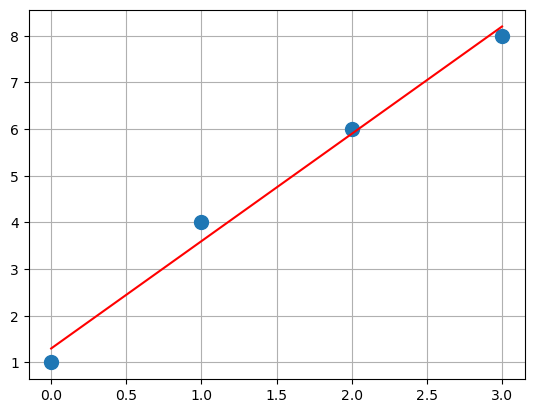

In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3])
y = np.array([1, 4, 6, 8])

A = np.vstack([x, np.ones(4)]).T
k, b = np.linalg.lstsq(A, y, rcond=None)[0]

print (k,b)
plt.plot(x, y, 'o', markersize=10)
plt.plot(x, k * x + b, 'r')
plt.grid()
plt.show()

# Задание 1.1.2

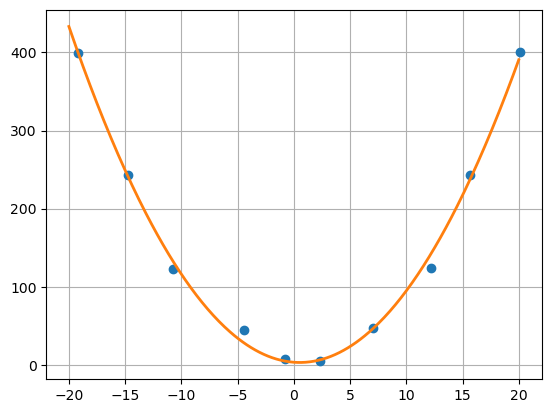

In [21]:
delta = 3.0
x = np.linspace(-20, 20, 10) 
y = x**2 + delta * (rnd.rand(10) - 0.2)
x += delta * (rnd.rand(10) - 0.2)

m = np.vstack([x**2, x, np.ones(10)]).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(-20, 20, 322)

plt.plot(x, y, 'o')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec +s[2], '-', lw=2)
plt.grid()
plt.show()

# Задание 1.1.3

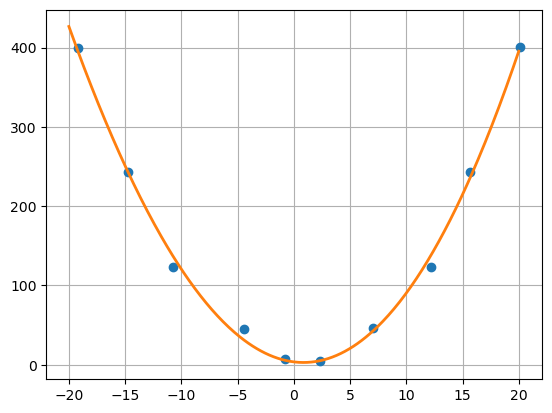

In [22]:
m = np.vstack([x**3, x**2, x, np.ones(10)]).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(-20, 20, 322)

plt.plot(x, y, 'o')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 +s[2]*x_prec + s[3], '-', lw=2)
plt.grid()
plt.show()

# Задание 1.1.4

In [48]:
from scipy.optimize import curve_fit

def task(f, beta):
    xdata = np.linspace(1, 5, 50)

    y = f(xdata, *beta)

    ydata = y + 0.05 * np.random.randn(len(xdata))

    beta_opt, beta_cov = curve_fit(f, xdata, ydata)

    lin_dev = sum(beta_cov[0])

    residuals = ydata - f(xdata, *beta_opt)
    fres = sum(residuals**2)

    fig, ax = plt.subplots()
    ax.scatter(xdata, ydata)
    ax.plot(xdata, y, 'r', lw=2)
    ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
    ax.set_xlim(1, 5)
    plt.show()

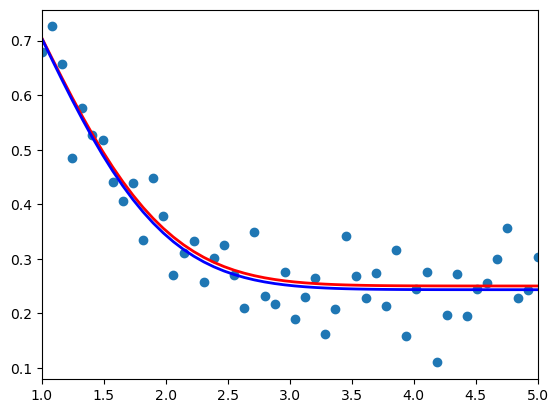

In [49]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
task(f, beta)

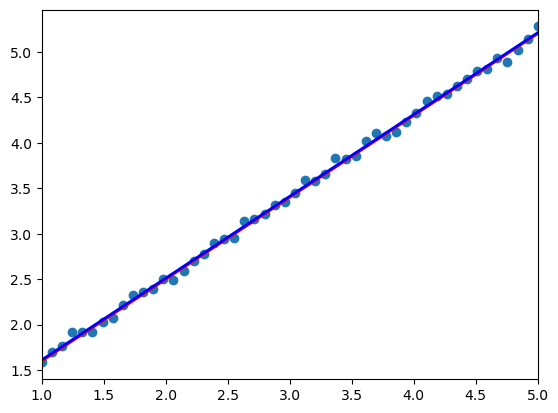

In [50]:
beta = (0.7, 0.9)
def f(x, b0, b1):
    return b0 + b1 * x
task(f, beta)

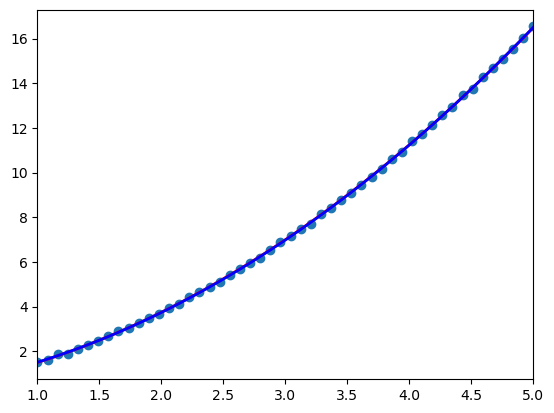

In [51]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1*x + b2 * (x**2)
task(f, beta)

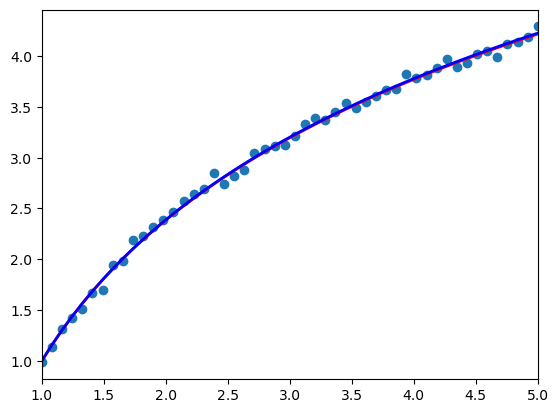

In [52]:
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
task(f, beta)

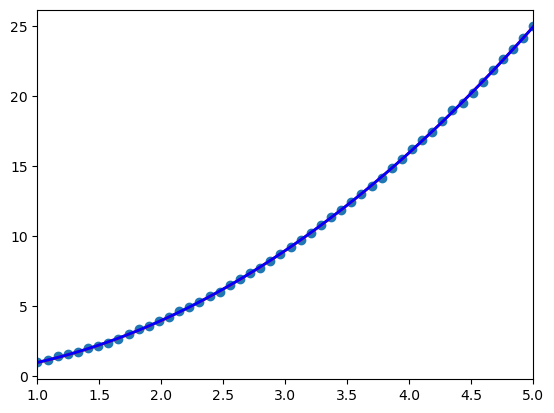

In [53]:
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x**b1
task(f, beta)

# Задание 1.2.1

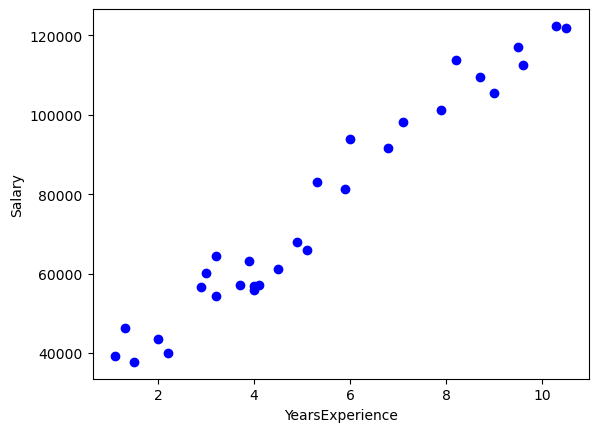

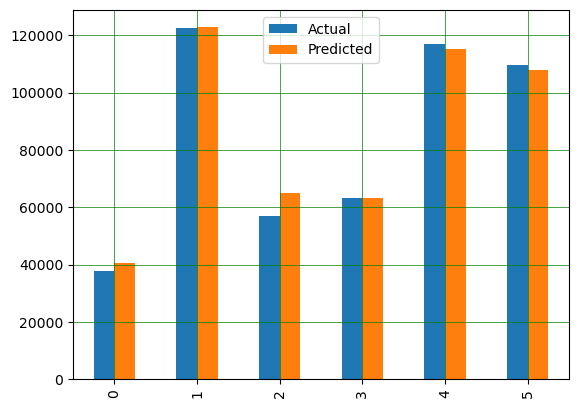

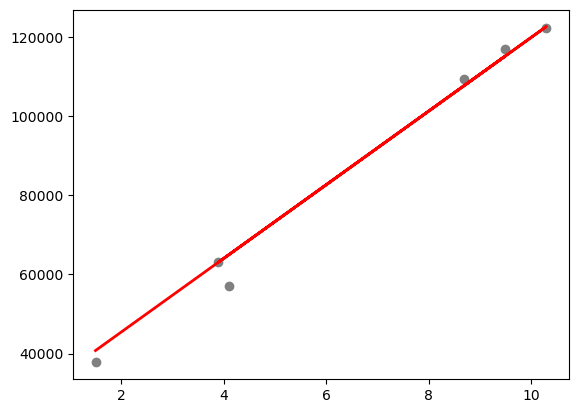

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv("table.csv", delimiter=',')

plt.scatter(dataset["YearsExperience"], dataset["Salary"], color='b')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

x = dataset.iloc[:, : -1].values
y = dataset["Salary"].tolist()

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_pred})

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, Y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# Задача 1.3.1

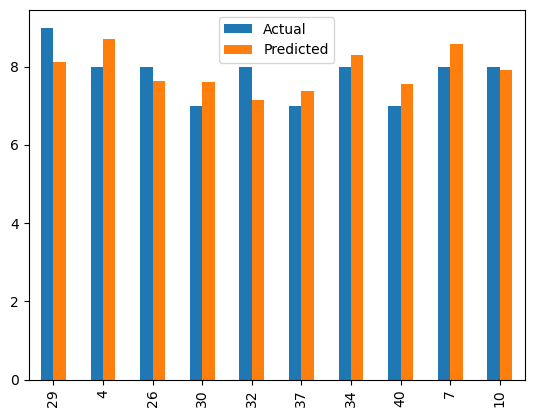

MSE:  0.34305857902740977


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataset = pd.read_csv('table_1.csv', delimiter=',')
dataset.head(10)

x = dataset[['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = dataset['Petrol_tax']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_pred})

df.plot(kind='bar')
plt.show()

print('MSE: ', metrics.mean_squared_error(Y_test, y_pred))